Plotting with Matplotlib
========================

``````{admonition} Overview
:class: overview

Questions:

* How can I create plots using matplotlib?

Objectives:

* Use pandas built-in plotting.

* Use matplotlib's object oriented interface to make figures with subplots.

``````

Matplotlib is among the oldest and most widely used plotting libraries in Python. 
Some plotting libraries, such as seaborn, are built-in top of Matplotlib. Matplotlib is very flexible and customizable. 

In this section, we will see how three ways we can use matplotlib to create plots. 
The most customizable interface is the object oriented interface. 
Learning to use matplotlib will allow you to make beautiful, publication-quality plots and will help you more effectively use libraries which interface with matplotlib.

We'll start by reading in the same data file we've been using for this session. We'll look at the visualization built in the pandas dataframe, then discuss making custom visualizations with matplotlib.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/delaney-processed.csv")

df.rename( columns = {
    "ESOL predicted log solubility in mols per litre": "ESOL solubility (mol/L)",
    "measured log solubility in mols per litre" : "measured solubility (mol/L)"
}, inplace=True)

df.head()

,Compound ID,ESOL solubility (mol/L),Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured solubility (mol/L),smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


The pandas dataframe has built-in plotting using the command `df.plot`. By default, this function will plot the numerical columns against the index.

<AxesSubplot: >

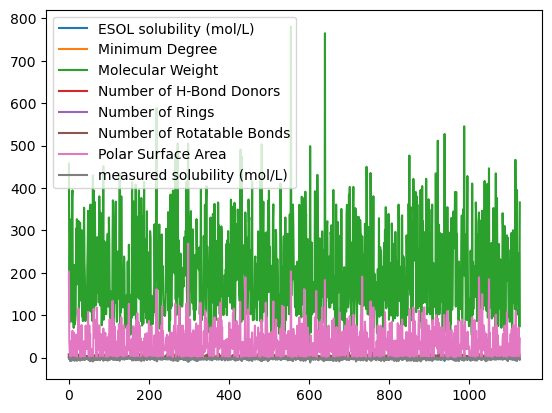

In [3]:
df.plot()

You can also create plots using specific columns for x and y values by setting the appropriate options.

<AxesSubplot: xlabel='Molecular Weight', ylabel='measured solubility (mol/L)'>

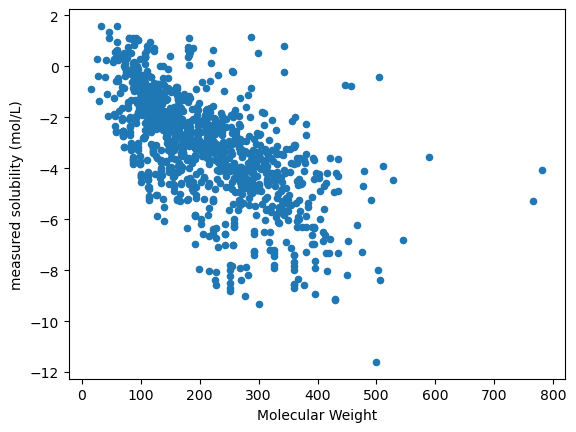

In [4]:
df.plot(x="Molecular Weight", y="measured solubility (mol/L)", kind="scatter")

Behind the scenes, `df.plot` is calling matplotlib. Pandas is constantly being developed and new capabilties being added. The built-in plotting function for pandas has many options you can specify, which you can read about [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). In this section we are going to see how to use and customize matplotlib plots in detail.

Understanding how matplotlib works will help you work with other libraries, including seaborn, which build on top of matplotlib.

In [5]:
import matplotlib.pyplot as plt

If you've used matplotlib before, it's likely that you've worked with the matplotlib procedural interface. When you use this interface, each command is added to the current figure.

Text(0, 0.5, 'Solubility (mol/L)')

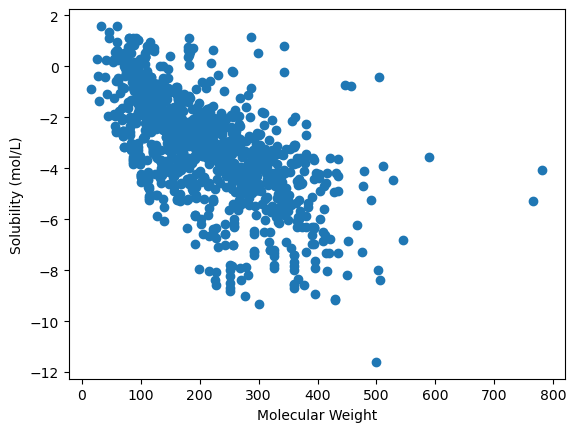

In [7]:
# procedural interface - if you've programmed in python before this is what you've used

plt.figure()
plt.scatter("Molecular Weight", "measured solubility (mol/L)", data=df)
plt.xlabel("Molecular Weight")
plt.ylabel("Solubility (mol/L)")

## Object Oriented Interface
This lesson discusses creating plots using matplotlib’s object oriented interface. “Object oriented” here refers to the fact that when we use this interface, the figure, figure axes and other plot components will be available to use as variables or objects. Using matplotlib this way will allow us to have greater control over our plots.

Let’s see how we can make the same plots we made with the procedural interface using an object oriented approach.

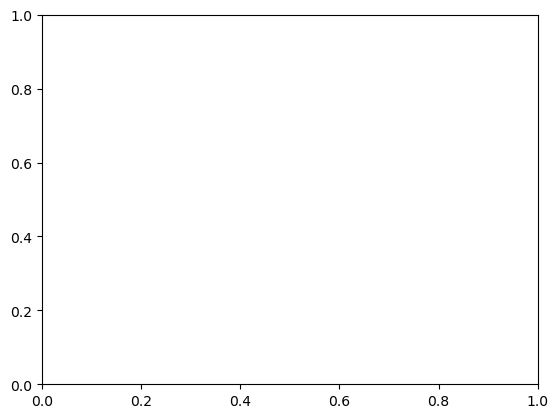

In [8]:
# object oriented interface
fig, ax = plt.subplots()

Text(0, 0.5, 'Solubility (mol/L)')

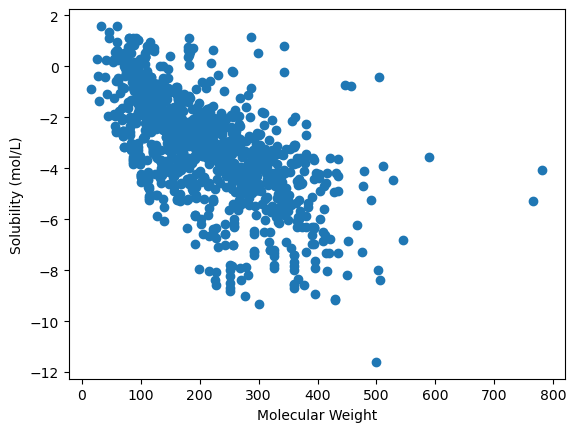

In [10]:
fig, ax = plt.subplots()
ax.scatter("Molecular Weight", "measured solubility (mol/L)", data=df)
ax.set_xlabel("Molecular Weight")
ax.set_ylabel("Solubility (mol/L)")

You can add more data to the plot by continuing to add plotting commands.

```python
ax.scatter("Molecular Weight", "ESOL Solubility (mol/L)", data=df)
ax.legend(loc='upper right')
```

## Subplots

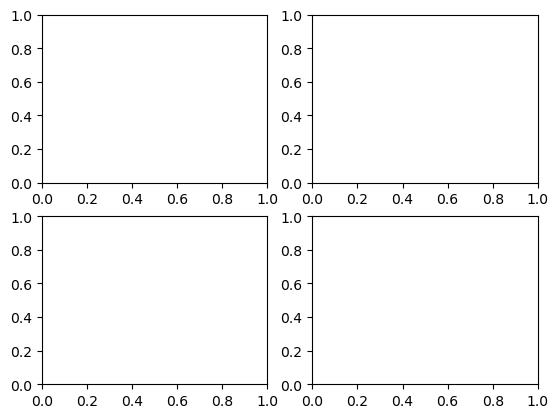

In [11]:
fig, ax = plt.subplots(2, 2)

In [12]:
ax.shape

(2, 2)

Text(0, 0.5, 'ESOL Predicted Solubility')

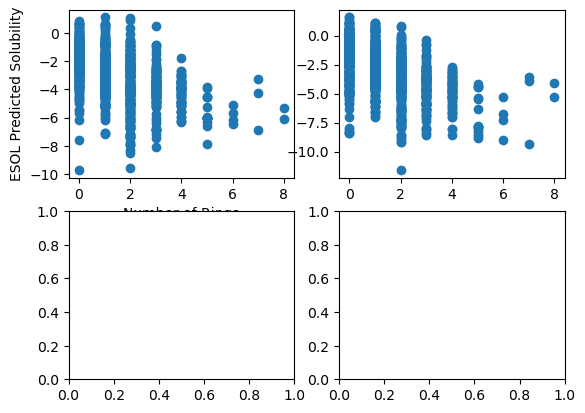

In [14]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].scatter("Number of Rings", "ESOL solubility (mol/L)", data=df)

ax[0, 1].scatter("Number of Rings", "measured solubility (mol/L)", data=df)
ax[0, 0].set_xlabel("Number of Rings")
ax[0, 0].set_ylabel("ESOL Predicted Solubility")

Adding `fig.tight_layout()` as the last function will fix the overlapping of text and plots.

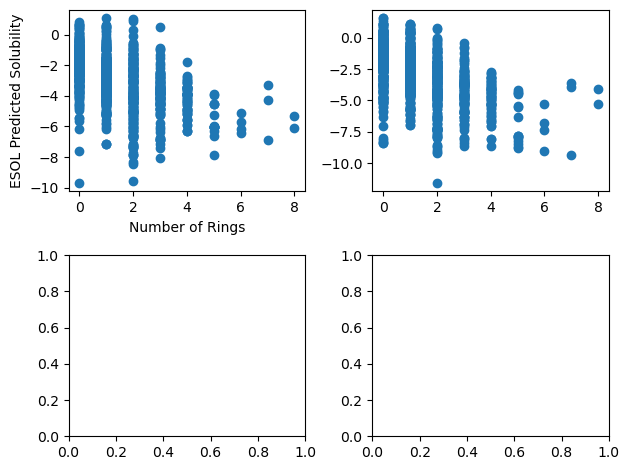

In [16]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].scatter("Number of Rings", "ESOL solubility (mol/L)", data=df)

ax[0, 1].scatter("Number of Rings", "measured solubility (mol/L)", data=df)
ax[0, 0].set_xlabel("Number of Rings")
ax[0, 0].set_ylabel("ESOL Predicted Solubility")

fig.tight_layout()

## Plot Customization

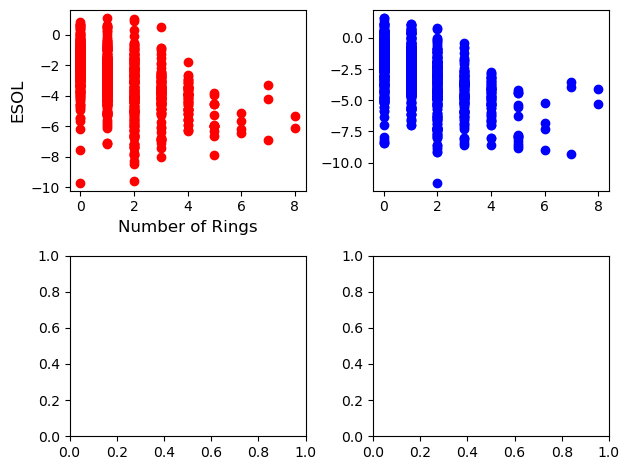

In [17]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].scatter("Number of Rings", "ESOL solubility (mol/L)", data=df, color="red")

ax[0, 1].scatter("Number of Rings", "measured solubility (mol/L)", data=df, color="blue")
ax[0, 0].set_xlabel("Number of Rings", fontsize=12)
ax[0, 0].set_ylabel("ESOL", fontsize=12)

fig.tight_layout()

``````{admonition} Key Points
:class: key

* Pandas dataframes have built in plotting.

* You can use matplotlib to create figures with multiple plots.
``````